<a href="https://colab.research.google.com/github/litawandani/TugasPratikumML_234-244/blob/main/Preprocessing_%2B_Augmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Praktikum"

In [ ]:
%cd /content/drive/MyDrive/Praktikum

/content/drive/MyDrive/Praktikum


In [ ]:
!ls  

dataset  dataset_model	kaggle.json


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
from distutils.dir_util import copy_tree, remove_tree

base_dir = "/content/drive/My Drive/Praktikum/Alzheimer_s Dataset"
root_dir = "./"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
  remove_tree (work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
!pip install split_folders
import splitfolders

src = "/content/drive/My Drive/Praktikum/dataset"
base_dir = "/content/drive/My Drive/Praktikum/dataset_model"

splitfolders.ratio(src, output = base_dir, seed=240, ratio=(0.8,0.19,0.01))

Copying files: 6400 files [16:13,  6.57 files/s]


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

MildDem_train_dir = os.path.join(train_dir, 'MildDemented')
ModDem_train_dir = os.path.join(train_dir, 'ModerateDemented')
NonDem_train_dir = os.path.join(train_dir, 'NonDemented')
VermilDem_train_dir = os.path.join(train_dir, 'VeryMildDemented')

MildDem_val_dir = os.path.join(validation_dir, 'MildDemented')
ModDem_val_dir = os.path.join(validation_dir, 'ModerateDemented')
NonDem_val_dir = os.path.join(validation_dir, 'NonDemented')
VermilDem_val_dir = os.path.join(validation_dir, 'VeryMildDemented')

MildDem_test_dir = os.path.join(test_dir, 'MildDemented')
ModDem_test_dir = os.path.join(test_dir, 'ModerateDemented')
NonDem_test_dir = os.path.join(test_dir, 'NonDemented')
VermilDem_test_dir = os.path.join(test_dir, 'VeryMildDemented')

In [ ]:
print('total training MildDemented images :', len(os.listdir(MildDem_train_dir)))
print('total training ModerateDemented images :', len(os.listdir(ModDem_train_dir)))
print('total training NonDemented images :', len(os.listdir(NonDem_train_dir)))
print('total training VeryMildDemented images :', len(os.listdir(VermilDem_train_dir)))

print('\ntotal test MildDemented images :', len(os.listdir(MildDem_test_dir)))
print('total test ModerateDemented images :', len(os.listdir(ModDem_test_dir)))
print('total test NonDemented images :', len(os.listdir(NonDem_test_dir)))
print('total test VeryMildDemented images :', len(os.listdir(VermilDem_test_dir)))

print('\ntotal validation MildDemented images :', len(os.listdir(MildDem_val_dir)))
print('total validation ModerateDemented images :', len(os.listdir(ModDem_val_dir)))
print('total validation NonDemented images :', len(os.listdir(NonDem_val_dir)))
print('total validation VeryMildDemented images :', len(os.listdir(VermilDem_val_dir)))

total training MildDemented images : 716
total training ModerateDemented images : 51
total training NonDemented images : 2560
total training VeryMildDemented images : 1978

total test MildDemented images : 10
total test ModerateDemented images : 1
total test NonDemented images : 32
total test VeryMildDemented images : 35

total validation MildDemented images : 170
total validation ModerateDemented images : 12
total validation NonDemented images : 608
total validation VeryMildDemented images : 621


#Augmentasi Data

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 150
width = 150
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 5305 images belonging to 4 classes.
Found 1411 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


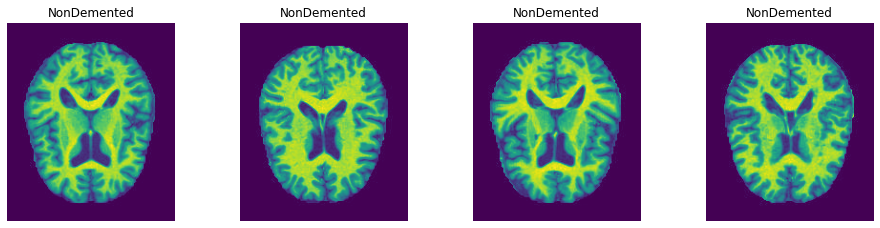

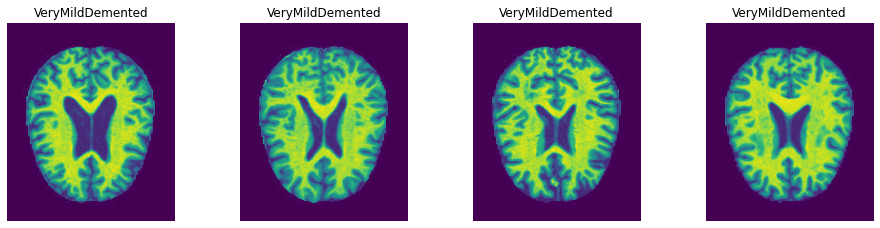

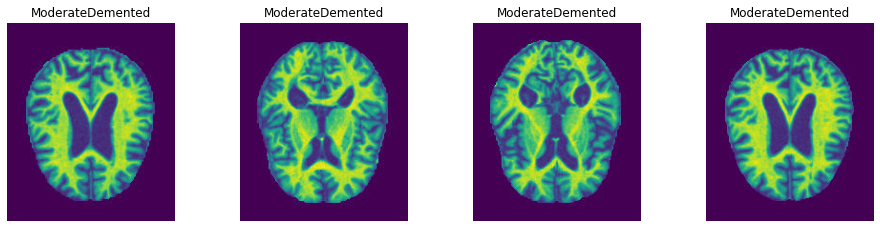

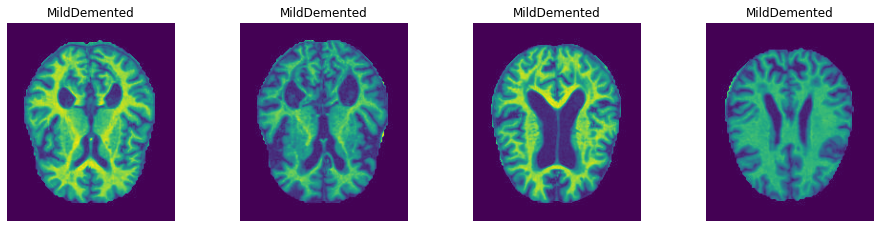

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

NonDemented_images = os.listdir(NonDem_train_dir)
VeryMildDemented_images = os.listdir(VermilDem_train_dir)
ModerateDemented_images = os.listdir(ModDem_train_dir)
MildDemented_images = os.listdir(MildDem_train_dir)

fname1 = [os.path.join(NonDem_train_dir,fname)
        for fname in NonDemented_images[:4]]

fname2 = [os.path.join(VermilDem_train_dir,fname)
        for fname in VeryMildDemented_images[:4]]

fname3 = [os.path.join(ModDem_train_dir,fname)
        for fname in ModerateDemented_images[:4]]

fname4 = [os.path.join(MildDem_train_dir,fname)
        for fname in MildDemented_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('NonDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('VeryMildDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('ModerateDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('MildDemented')
    plt.imshow(img)
plt.show()

#Preprocessing

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Val Data = ", val_data.shape)
print("Val Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5305, 150, 150, 3)
Train Label =  (5305,)
Val Data =  (1411, 150, 150, 3)
Val Label =  (1411,)
Test Data =  (78, 150, 150, 3)
Test Label =  (78,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented'
 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]
